#  Automated Brazilian Daily Inflation Forecast - Next 2 Years - Version v01
## Based on Brazilian Central Bank Expectations (Next 2 years)

#### Developed by Leonardo Travagini Delboni

#### Special thanks to the following libraries:
* [Pandas Library](https://pandas.pydata.org/docs/reference/frame.html)
* [python-bcb by Wilson Freitas](https://wilsonfreitas.github.io/python-bcb/index.html)

In [1]:
# OBS - For this program it will be necessary to install the API developed by Wilson Freitas (libray bcb)
# install libs                    # API - Brazilian Central Bank (Banco Central Brasileiro)
# ! pip install python-bcb

In [2]:
#import bcb lib|                  # Brazilian Central Bank APIs (bcb)
import pandas as pd                      # library to work with dataframes
from bcb import Expectativas             # library/API of the Brazilian Central Bank Expectations
from datetime import timedelta           # library to work with dates and ranges of time
from datetime import datetime            # library to work with dates and ranges of time
import matplotlib.pyplot as plt          # library for graphic plot
import seaborn as sns                    # library for data visualization

In [3]:
# Rendering images in a higher resolution - Retina option:
%config InlineBackend.figure_format='retina'

In [4]:
# Describing all available APIs from bcb library:
Expectativas().describe()

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativasMercadoInstituicoes
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoSelic
  ExpectativasMercadoTop5Selic
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais


In [5]:
# Displaying all the properties and their data unit for this API:
Expectativas().describe('ExpectativaMercadoMensais')


EntitySet (Endpoint): ExpectativaMercadoMensais
EntityType: br.gov.bcb.olinda.servico.Expectativas.ExpectativaMercadoMensal
Properties: Indicador<str>, Data<str>, DataReferencia<str>, Media<float>, Mediana<float>, DesvioPadrao<float>, Minimo<float>, Maximo<float>, numeroRespondentes<int>, baseCalculo<int>


In [6]:
# Choosing the wished API from those displayed on the terminal:
exp = Expectativas().get_endpoint("ExpectativaMercadoMensais")

In [7]:
# Chosing the parameters as per the chosen API --- Main INPUTS:
filter_baseCalculo = "0"                                        # To match the values with the source
filter_Indicador = "IPCA"                                       # Choosing 'IPCA' 
filter_limite = int("24")                                       # Next 2 years (24 months)

# Getting data (type Dataframe -- Pandas) from BCB library as per the inputs chosen above:
data = (
  exp
    
    # internal function
    .query() 

    # filter with type Indicador and baseCalculo
    .filter(exp.Indicador == filter_Indicador, exp.baseCalculo == filter_baseCalculo) 

    # get first 24 rows
    .limit(filter_limite)

    # select specific colunms
    .select(exp.DataReferencia, exp.Media)
    
    # return results
    .collect()
);

# Creating a dataframe table:
data                 # To check the solution step-by-step uncomment this line and execute it

,DataReferencia,Media
0,10/2024,0.3145
1,09/2024,0.2595
2,08/2024,0.1608
3,07/2024,0.1807
4,06/2024,0.2133
5,05/2024,0.2422
6,04/2024,0.3108
7,03/2024,0.3255
8,02/2024,0.4219
9,01/2024,0.4099


## Converting column to datetime type:

In [8]:
# Converting column 'DataReferencia' from string type to Datetime type:
data['DataReferencia'] = pd.to_datetime(data['DataReferencia'])
data                 # To check the solution step-by-step uncomment this line and execute it

,DataReferencia,Media
0,2024-10-01,0.3145
1,2024-09-01,0.2595
2,2024-08-01,0.1608
3,2024-07-01,0.1807
4,2024-06-01,0.2133
5,2024-05-01,0.2422
6,2024-04-01,0.3108
7,2024-03-01,0.3255
8,2024-02-01,0.4219
9,2024-01-01,0.4099


In [9]:
# Sorting by ascending order of time using the DataReferencia column:
data = data.sort_values(by="DataReferencia", ascending=True)
data                 # To check the solution step-by-step uncomment this line and execute it

,DataReferencia,Media
23,2022-11-01,0.4302
22,2022-12-01,0.6963
21,2023-01-01,0.5865
20,2023-02-01,0.6102
19,2023-03-01,0.4499
18,2023-04-01,0.4524
17,2023-05-01,0.3368
16,2023-06-01,0.3174
15,2023-07-01,0.2910
14,2023-08-01,0.2345


## Getting the line angular coefficient (slope):

In [10]:
import calendar

In [11]:
# Creating a second column 'Media_shifted' and with the Media value from the next month:
data['Media_shifted'] = data['Media'].shift(-1)
data                 # To check the solution step-by-step uncomment this line and execute it

,DataReferencia,Media,Media_shifted
23,2022-11-01,0.4302,0.6963
22,2022-12-01,0.6963,0.5865
21,2023-01-01,0.5865,0.6102
20,2023-02-01,0.6102,0.4499
19,2023-03-01,0.4499,0.4524
18,2023-04-01,0.4524,0.3368
17,2023-05-01,0.3368,0.3174
16,2023-06-01,0.3174,0.2910
15,2023-07-01,0.2910,0.2345
14,2023-08-01,0.2345,0.3220


In [12]:
# Creating a third column with the delta (difference) between the medias:
data['deltaY'] = data['Media_shifted'] - data['Media']
data                 # To check the solution step-by-step uncomment this line and execute it

,DataReferencia,Media,Media_shifted,deltaY
23,2022-11-01,0.4302,0.6963,0.2661
22,2022-12-01,0.6963,0.5865,-0.1098
21,2023-01-01,0.5865,0.6102,0.0237
20,2023-02-01,0.6102,0.4499,-0.1603
19,2023-03-01,0.4499,0.4524,0.0025
18,2023-04-01,0.4524,0.3368,-0.1156
17,2023-05-01,0.3368,0.3174,-0.0194
16,2023-06-01,0.3174,0.2910,-0.0264
15,2023-07-01,0.2910,0.2345,-0.0565
14,2023-08-01,0.2345,0.3220,0.0875


In [13]:
# Creating a forth column with the total number of days for each month using the calendar.monthrange:
data['n_days'] = data['DataReferencia'].apply(lambda x : calendar.monthrange(x.year, x.month)[1] )
data                 # To check the solution step-by-step uncomment this line and execute it

,DataReferencia,Media,Media_shifted,deltaY,n_days
23,2022-11-01,0.4302,0.6963,0.2661,30
22,2022-12-01,0.6963,0.5865,-0.1098,31
21,2023-01-01,0.5865,0.6102,0.0237,31
20,2023-02-01,0.6102,0.4499,-0.1603,28
19,2023-03-01,0.4499,0.4524,0.0025,31
18,2023-04-01,0.4524,0.3368,-0.1156,30
17,2023-05-01,0.3368,0.3174,-0.0194,31
16,2023-06-01,0.3174,0.2910,-0.0264,30
15,2023-07-01,0.2910,0.2345,-0.0565,31
14,2023-08-01,0.2345,0.3220,0.0875,31


In [14]:
# Calculating the Angular Coefficient as the new fifth column:
data['coef_ang'] = data['deltaY'] / data['n_days']
data                 # To check the solution step-by-step uncomment this line and execute it

,DataReferencia,Media,Media_shifted,deltaY,n_days,coef_ang
23,2022-11-01,0.4302,0.6963,0.2661,30,0.008870
22,2022-12-01,0.6963,0.5865,-0.1098,31,-0.003542
21,2023-01-01,0.5865,0.6102,0.0237,31,0.000765
20,2023-02-01,0.6102,0.4499,-0.1603,28,-0.005725
19,2023-03-01,0.4499,0.4524,0.0025,31,0.000081
18,2023-04-01,0.4524,0.3368,-0.1156,30,-0.003853
17,2023-05-01,0.3368,0.3174,-0.0194,31,-0.000626
16,2023-06-01,0.3174,0.2910,-0.0264,30,-0.000880
15,2023-07-01,0.2910,0.2345,-0.0565,31,-0.001823
14,2023-08-01,0.2345,0.3220,0.0875,31,0.002823


In [15]:
# Creating a daily dataframe with linear interpolation using the original dataframe 'Data':

def create_dataframe(INICIO, coef_linear, coef_ang, n_days):
    
    # Calculating the last day for each month (original period):
    FIM = INICIO + timedelta(days=(n_days-1))
    # Converting to dataframe:
    df_aux = pd.DataFrame()
    # Creating the new period in days (daily):
    days = pd.date_range(start=INICIO, end=FIM)
    # Creating the daily date column:
    df_aux['Date'] = days
    # Creating an empty vector:
    valor_diario = []
    # Linear interpolation for every day in each period using the coefficients to feed the vector:
    for i in range(n_days):
        value = coef_linear + i * coef_ang
        valor_diario.append(value)  
    # Displaying the interpolated values in the column on the new dataframe:
    df_aux['Inflation_Forecast'] = valor_diario
    return df_aux

In [16]:
# Creating an empty dataframe 'df_full':
df_full = pd.DataFrame()

# Creating 1 dataframe for every month of the 24 months, according to each amount of days per month:
for index, row in data.iterrows():
    df_aux = create_dataframe(row['DataReferencia'], row['Media'], row['coef_ang'], row['n_days'])
    df_full = pd.concat([df_full, df_aux], axis=0)

df_full                             # To check the solution step-by-step uncomment this line and execute it

,Date,Inflation_Forecast
0,2022-11-01,0.43020
1,2022-11-02,0.43907
2,2022-11-03,0.44794
3,2022-11-04,0.45681
4,2022-11-05,0.46568
...,...,...
26,2024-10-27,NaN
27,2024-10-28,NaN
28,2024-10-29,NaN
29,2024-10-30,NaN


In [17]:
# Displaying the index column for each single value accordingly without repetition:
df_full = df_full.reset_index(drop=True)
df_full                             # To check the solution step-by-step uncomment this line and execute it

,Date,Inflation_Forecast
0,2022-11-01,0.43020
1,2022-11-02,0.43907
2,2022-11-03,0.44794
3,2022-11-04,0.45681
4,2022-11-05,0.46568
...,...,...
726,2024-10-27,NaN
727,2024-10-28,NaN
728,2024-10-29,NaN
729,2024-10-30,NaN


In [18]:
# Due to the limitation of linear interpolation using shifted media, the daily values for the last month
# cannot be achieved, so for this, they are displayed as "NaN" values. We are going to exclude them:
df_full = df_full.dropna(axis=0)

In [19]:
f_full

,Date,Inflation_Forecast
0,2022-11-01,0.430200
1,2022-11-02,0.439070
2,2022-11-03,0.447940
3,2022-11-04,0.456810
4,2022-11-05,0.465680
...,...,...
695,2024-09-26,0.305333
696,2024-09-27,0.307167
697,2024-09-28,0.309000
698,2024-09-29,0.310833


Text(0.5, 1.0, 'Brazilian Daily Inflation Forecast - Next 2 Years')

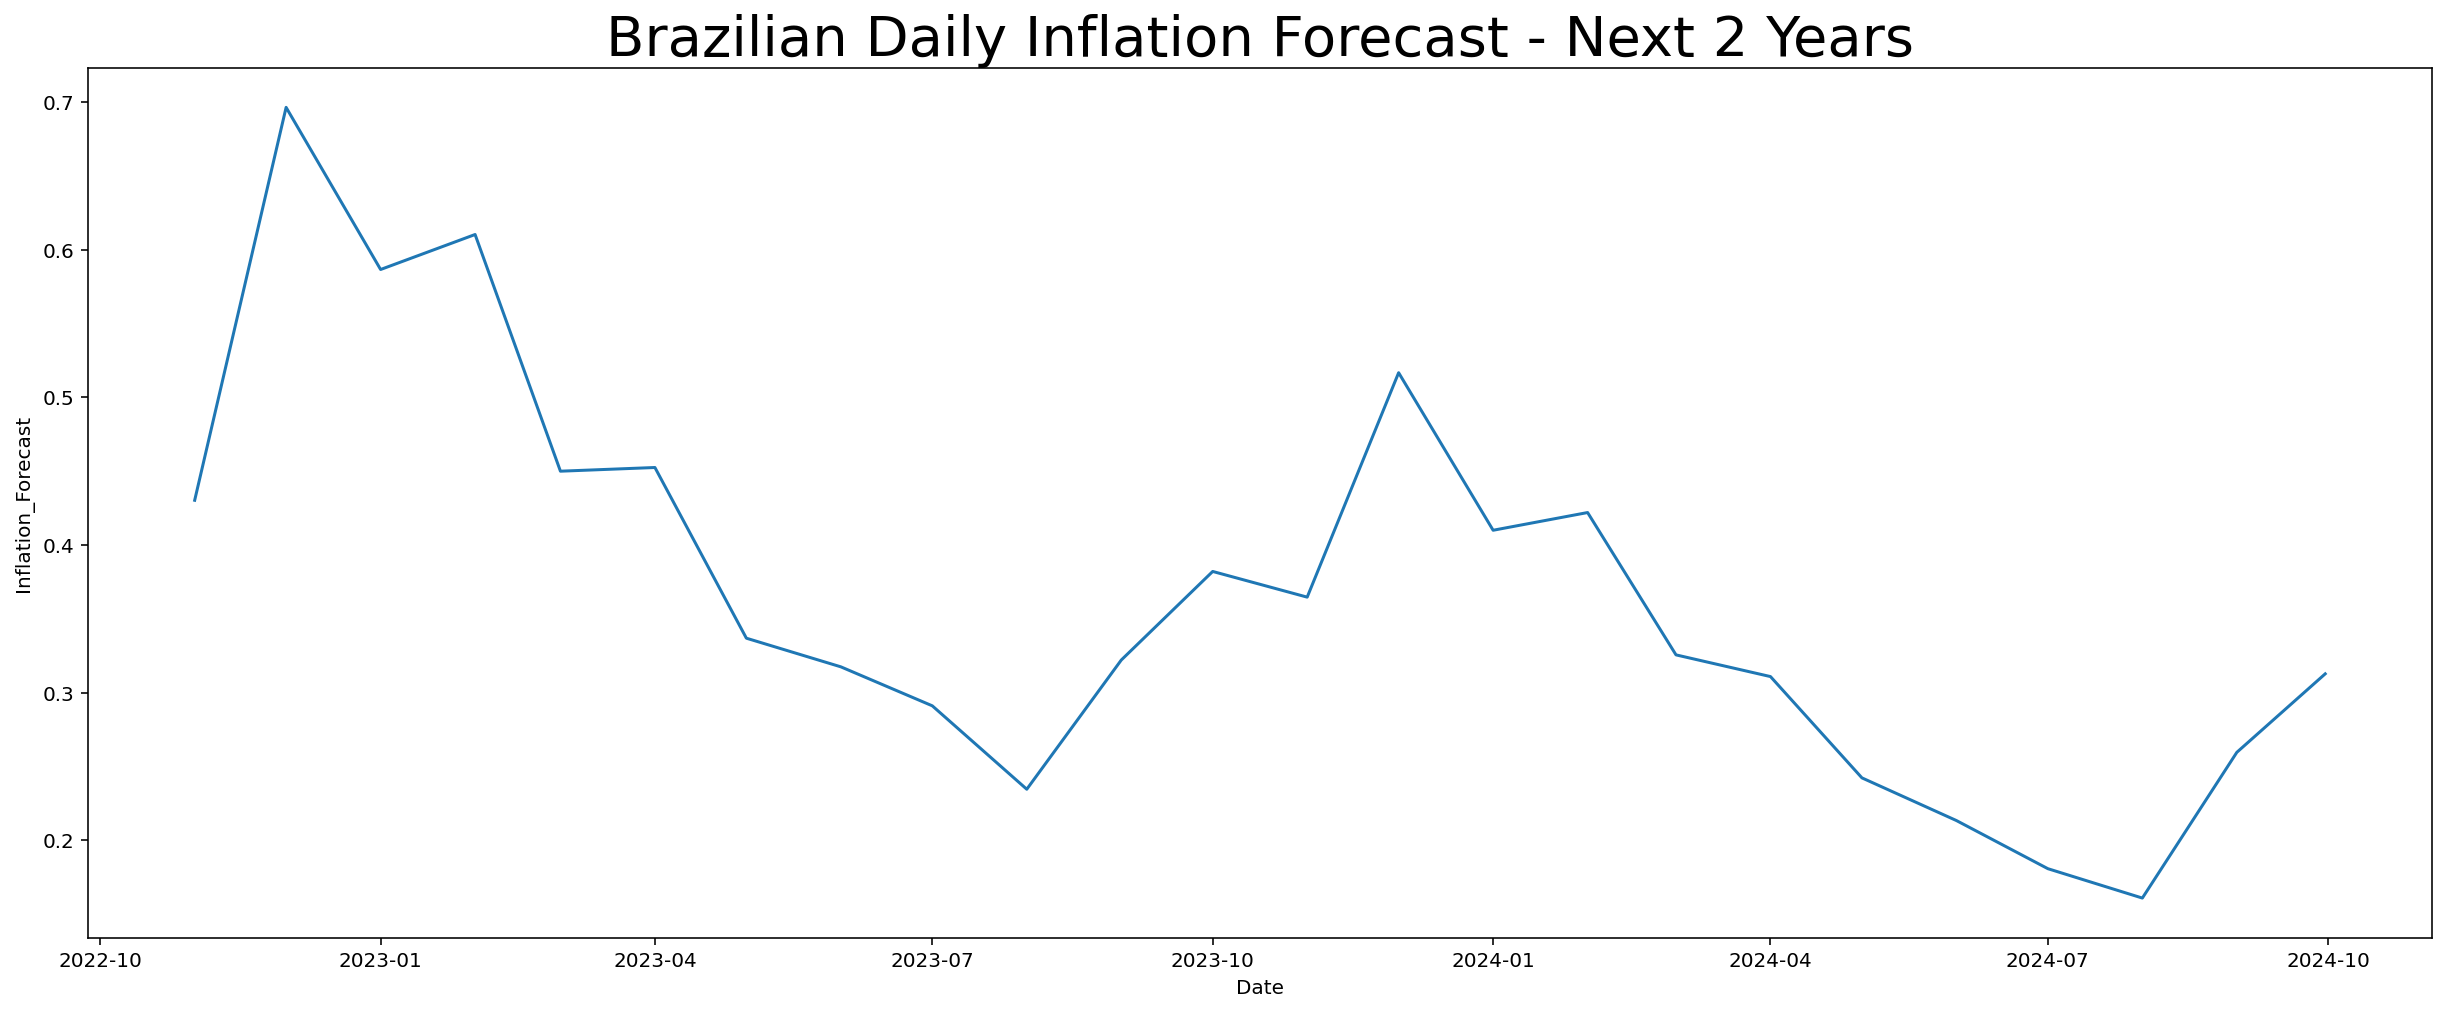

In [20]:
# Using Matplotlib library to display the wished graph accordingly:
fig, ax = plt.subplots(figsize = (21,8))                                               # MatPlotLib Library
sns.lineplot(data = df_full, x='Date', y='Inflation_Forecast', ax=ax)                  # Seaborn Library
plt.title("Brazilian Daily Inflation Forecast - Next 2 Years", fontsize=28)            # MatPlotLib Library